# Combining DataFrames with Pandas #

In [8]:
%matplotlib
import pandas as pd
survey_1 = pd.read_csv("survey2001.csv")
survey_2 = pd.read_csv("survey2002.csv")

In [16]:
survey_vstack = pd.concat([survey_1, survey_2], axis=0)
survey_vstack.reset_index()
##export 
survey_vstack.to_csv("survey_combined_bpeng_hw1.csv")

/Users/baijiepeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [52]:
survey = pd.read_csv('survey_combined_bpeng_hw1.csv')
survey_cleared = survey.dropna(subset=['sex','wgt'])
survey_grouped = survey_cleared.groupby(["year","sex"])["wgt"].mean()
survey_grouped

year  sex
2001  F      36.221914
      M      36.481844
2002  F      34.016799
      M      37.589905
Name: wgt, dtype: float64

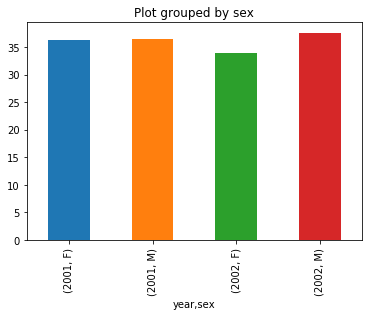

In [55]:
survey_grouped.plot(kind ='bar',stacked =True, title = 'Plot grouped by sex')

# Data Workflows and Automation#

In [4]:
import os
os.mkdir('yearly_files')
import pandas as pd

In [12]:
## Question 1 : Null values NOT included 
survey_data = pd.read_csv('surveys.csv')
survey_data = survey_data.dropna()  ## The question didnt specify which column to drop--- all NaN dropped

In [22]:
## Question 2 : Only every 5 years 
survey_data = pd.read_csv('surveys.csv')
survey_data = survey_data.dropna()  ## optional
all_years = survey_data['year'].unique()
wanted_years = all_years[::5]
for year in wanted_years: 
    survey_data_year = survey_data[survey_data.year == year] ## take certain year's data
    filename = 'yearly_files/surveys' + str(year) + '.csv' ## come up with file name
    survey_data_year.to_csv(filename)

In [26]:
## Question 3: Analysis by species
survey_data = pd.read_csv('surveys.csv')
survey_data = survey_data.dropna()  ## optional
all_species = survey_data['species_id'].unique()
for species in all_species: 
    survey_data_species = survey_data[survey_data.species_id == species] ## take certain year's data
    filename = 'yearly_files/surveys' + str(species) + '.csv' ## come up with file name
    survey_data_species.to_csv(filename)

# Data Ingest & Visualization - Matplotlib & Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
water_info = pd.read_table('bouldercreek_09_2013.txt')
water_info = water_info.drop(columns=['agency_cd', 'site_no','tz_cd', '04_00060_cd'])
water_info = water_info.drop(labels=0)
water_info = water_info.rename(columns={'04_00060':'water'})
water_info.datetime = water_info.datetime.astype('datetime64') 
water_info.water = water_info.water.astype('int32') 
## convert to data/time for further processing
water_info['date'] = [d.date() for d in water_info['datetime']]
water_info['Time'] = [d.time() for d in water_info['datetime']]

In [70]:
## all in sept
water_sept_all = water_info.groupby(['date'])['water'].sum().reset_index(name = 'count')

## filter some dates in sept
start_sept = pd.datetime(2013,9,9)
end_sept = pd.datetime(2013,9,15)
water_sept_frag = water_info[(water_info['date'] >= pd.datetime.date(start_sept))]# & water_info['date'] <= pd.datetime.date(end_sept))]
water_sept_frag = water_sept_frag[(water_sept_frag['date'] <= pd.datetime.date(end_sept))]
water_sept_frag = water_sept_frag.rename(columns={'04_00060':'water'})
water_sept_frag_byday = water_sept_frag.groupby(['date'])['water'].sum().reset_index(name = 'count')

## filter by time of the day
water_sept_day = water_info.groupby(['Time'])['water'].mean().reset_index(name = 'mean')

## discharge values within a day
water_mean = water_info.groupby(['date'])['water'].mean().reset_index(name = 'mean')
water_max  = water_info.groupby(['date'])['water'].max().reset_index(name = 'max')
water_min  = water_info.groupby(['date'])['water'].min().reset_index(name = 'min')

Text(0.5,1,'Each day in Sept')

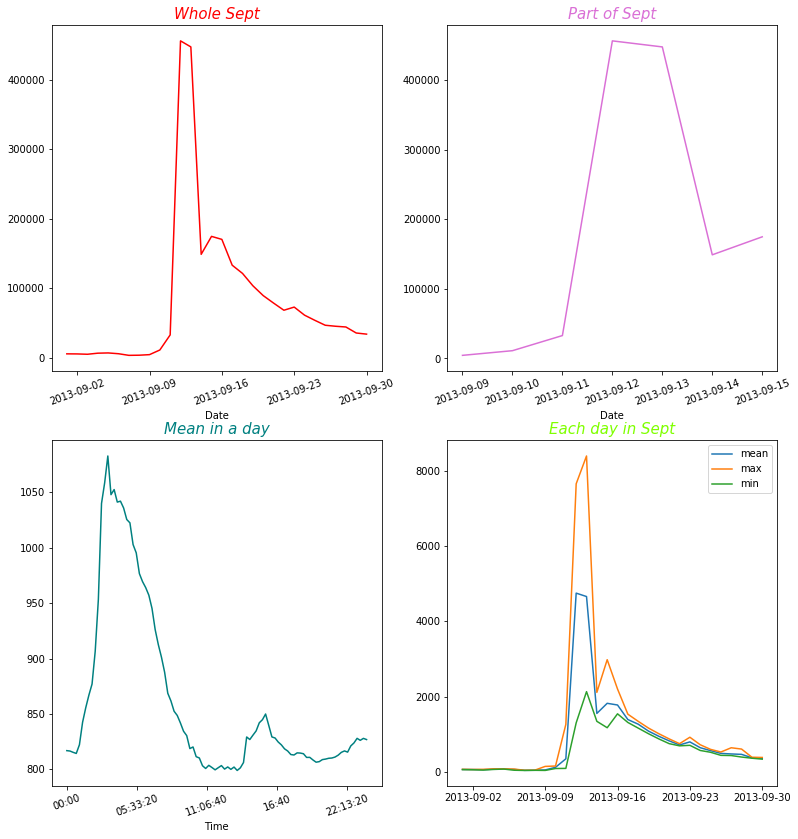

In [77]:
%matplotlib inline
fig, axes = plt.subplots(2,2,figsize = (13,14))
axes[0,0].plot(water_sept_all['date'],water_sept_all['count'], c = 'r')
axes[0,0].set_title('Whole Sept', color = 'r', style = 'italic', fontsize = 15)
axes[0,0].set_xlabel('Date')
axes[0,0].tick_params(axis = 'x',labelrotation = 20)

axes[0,1].plot(water_sept_frag_byday['date'],water_sept_frag_byday['count'], c = 'orchid')
axes[0,1].set_title('Part of Sept', color = 'orchid', fontsize = 15, style = 'italic')
axes[0,1].set_xlabel('Date')
axes[0,1].tick_params(axis = 'x',labelrotation = 20)

axes[1,0].plot(water_sept_day['Time'],water_sept_day['mean'], color = 'teal')
axes[1,0].set_title('Mean in a day', color = 'teal', style = 'italic', fontsize = 15)
axes[1,0].set_xlabel('Time')
axes[1,0].tick_params(axis = 'x',labelrotation = 20)

axes[1,1].plot(water_mean['date'], water_mean['mean'])
axes[1,1].plot(water_max['date'], water_max['max'])
axes[1,1].plot(water_min['date'], water_min['min'])
axes[1,0].tick_params(axis = 'x',labelrotation = 20)
axes[1,1].legend()
axes[1,1].set_title('Each day in Sept', color = 'chartreuse', fontsize = 15, style = 'italic')

In [6]:
water_sept_all['date']


0     2013-09-01
1     2013-09-02
2     2013-09-03
3     2013-09-04
4     2013-09-05
5     2013-09-06
6     2013-09-07
7     2013-09-08
8     2013-09-09
9     2013-09-10
10    2013-09-11
11    2013-09-12
12    2013-09-13
13    2013-09-14
14    2013-09-15
15    2013-09-16
16    2013-09-17
17    2013-09-18
18    2013-09-19
19    2013-09-20
20    2013-09-21
21    2013-09-22
22    2013-09-23
23    2013-09-24
24    2013-09-25
25    2013-09-26
26    2013-09-27
27    2013-09-28
28    2013-09-29
29    2013-09-30
Name: date, dtype: object

In [5]:
water_sept_all

,date,count
0,2013-09-01,5616
1,2013-09-02,5497
2,2013-09-03,5023
3,2013-09-04,6568
4,2013-09-05,6933
5,2013-09-06,5783
6,2013-09-07,3459
7,2013-09-08,3662
8,2013-09-09,4471
9,2013-09-10,11159
